Compare the default CFHTLS magnitudes and the improved mag_apercor magnitudes.

In [1]:
%matplotlib inline
import sys
sys.path.insert(0, '/global/common/software/lsst/common/miniconda/py3-4.2.12/lib/python3.6/site-packages')
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import GCRCatalogs

In [46]:
deep2 = Table.read('/global/homes/r/rongpu/data/descqa2/DEEP2_uniq_Terapix_Subaru.fits')
print(len(deep2))
mask = deep2['zquality']>=3
deep2 = deep2[mask]
print(len(deep2))

23822
16857


In [47]:
deep2_mag_list = ['u', 'g', 'r', 'i', 'z']
deep2_mag_list1 = ['u_apercor', 'g_apercor', 'r_apercor', 'i_apercor', 'z_apercor']

In [48]:
mask_deep2 = deep2['r_apercor']<24.0

mask_all = np.ones(len(deep2), dtype=bool)
for index in range(len(deep2_mag_list)):
    mag = deep2_mag_list[index]
    mask = (deep2[mag]>=0) & (deep2[mag]<50)
    print('Invalid {:12}{}'.format(mag, np.sum(~mask[mask_deep2])))
    mask_all &= mask
    mag = deep2_mag_list1[index]
    mask = (deep2[mag]>=0) & (deep2[mag]<50)
    print('Invalid {:12}{}'.format(mag, np.sum(~mask[mask_deep2])))
    mask_all &= mask
print('{} ({:.2f})% objects removed due to invalide magnitudes'\
      .format(np.sum(~mask_all), np.sum(~mask_all[mask_deep2])/np.sum(mask_deep2)*100))

mask_deep2 &= mask_all

deep2 = deep2[mask_deep2]
print(len(deep2))

Invalid u           332
Invalid u_apercor   295
Invalid g           275
Invalid g_apercor   275
Invalid r           274
Invalid r_apercor   274
Invalid i           277
Invalid i_apercor   277
Invalid z           281
Invalid z_apercor   276
602 (2.40)% objects removed due to invalide magnitudes
14215


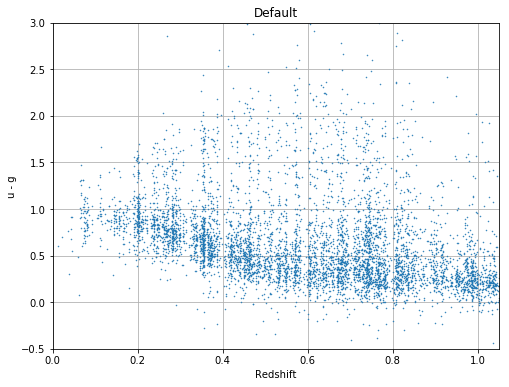

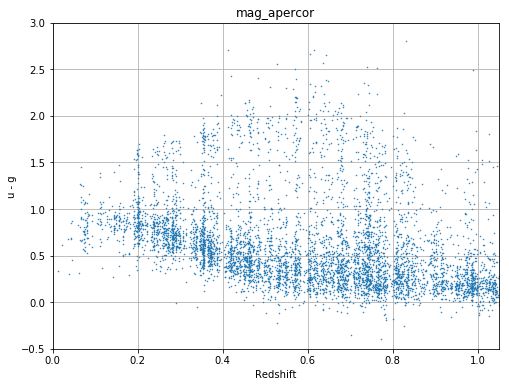

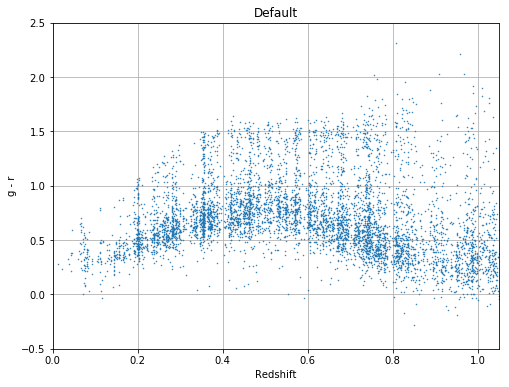

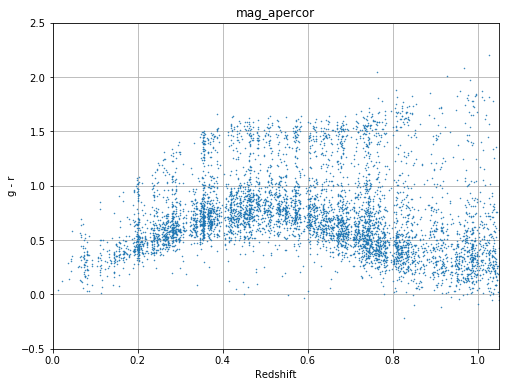

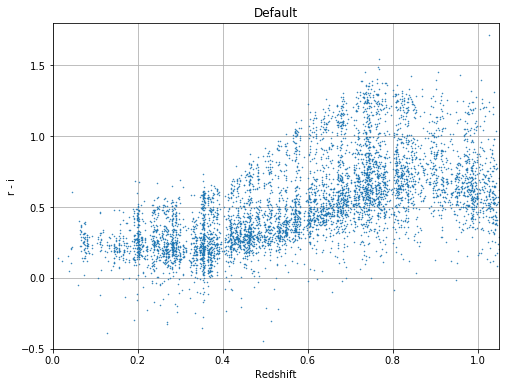

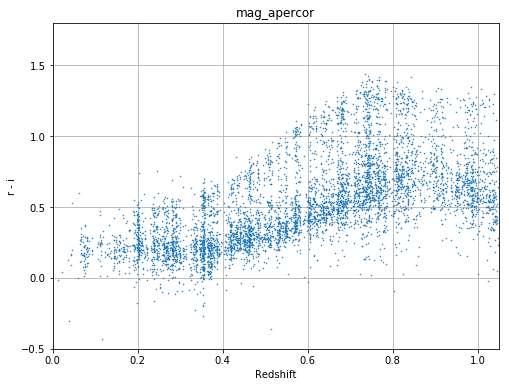

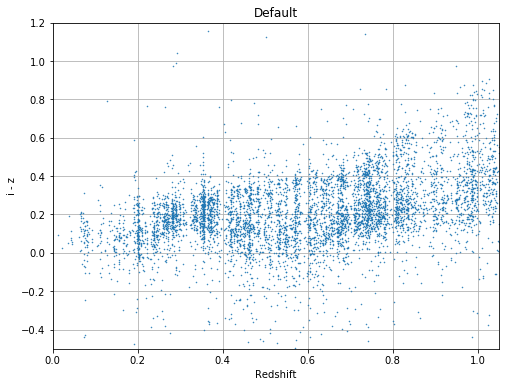

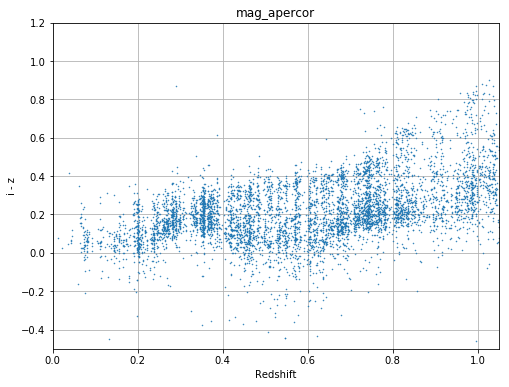

In [52]:
ylim_list = [[-0.5, 3.], [-0.5, 2.5], [-0.5, 1.8], [-0.5, 1.2]]

for index in range(len(deep2_mag_list)-1):
    
    deep2_mag1 = deep2_mag_list[index]
    deep2_mag2 = deep2_mag_list[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(deep2['zhelio'][::2], (deep2[deep2_mag1]-deep2[deep2_mag2])[::2], '.', markersize=1, alpha=1)
    plt.xlim(0., 1.05)
    plt.ylim(ylim_list[index])
    plt.xlabel('Redshift')
    plt.ylabel(deep2_mag1[0]+' - '+deep2_mag2[0])
    plt.title('Default')
    plt.grid()
    plt.savefig('/global/homes/r/rongpu/temp/descqa2/DEEP2_'+deep2_mag1[0]+'-'+deep2_mag2[0]+'_default.png')
    
    deep2_mag1 = deep2_mag_list1[index]
    deep2_mag2 = deep2_mag_list1[index+1]
    plt.figure(figsize=(8, 6))
    plt.plot(deep2['zhelio'][::2], (deep2[deep2_mag1]-deep2[deep2_mag2])[::2], '.', markersize=1, alpha=1)
    plt.xlim(0., 1.05)
    plt.ylim(ylim_list[index])
    plt.xlabel('Redshift')
    plt.ylabel(deep2_mag1[0]+' - '+deep2_mag2[0])
    plt.title('mag_apercor')
    plt.grid()
    plt.savefig('/global/homes/r/rongpu/temp/descqa2/DEEP2_'+deep2_mag1[0]+'-'+deep2_mag2[0]+'_apercor.png')